# KNN算法

机器学习算法：k近邻算法，有效而且易于掌握。

首先，探讨k近邻算法基本理论，以及如何使用距离测量的方法分类物品

其次，我们将使用Python从文本文件中导入并解析数据

再次，讨论当存在许多数据来源时，如何避免计算距离时可能碰到的一些常见错误

最后，利用实际的例子讲解如何使用k近邻算法改进约会网站和手写数字识别系统。

## k-近邻算法概述

思想：测量不同特征值之间的距离方法进行分类

优点：精度高、对异常值不敏感、无数据输入假定

缺点：计算复杂度高、空间复杂度高。 适用数据范围:数值型和标称型。

适用数据范围：数值型和标称型

工作原理：1.存在训练集，并且每个样本存在标签(即对应关系) 2.算法提取样本集中特征最相似(近邻)的分类标签 3.选择K个最相似数据中出现次数最多的分类，作为新数据分类。

k-近邻算法一般流程：

1.收集数据：可以使用任何方法

2.准备数据：距离计算所需的数值，最好是结构化的数据格式

3.分析数据：可以使用任何方法

4.训练算法：不适合于k-近邻算法

5.测试算法：计算错误率

6.使用算法：首先需要输入样本数据和结构化的输出结果，然后运行k近邻算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理。

## 准备:使用python导入数据

### 导入模块

In [2]:
# -*- coding: utf-8 -*-
import numpy  # 科学计算包
import matplotlib.pyplot as plt  # 可视化绘图
import operator  # 运算符模块
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 输出矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 编写创建训练集函数

In [3]:
def createDataSet():
    group = numpy.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

#### 训练集数据可视化

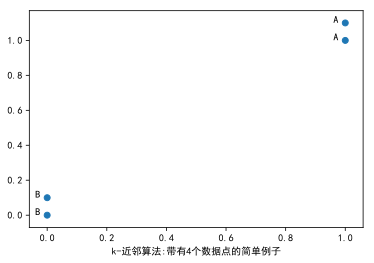

In [7]:
# 四个样例，俩个A类，俩个B类
group, labels = createDataSet()
# 画出数据集散点图
plt.scatter(group[:, 0], group[:, 1])
plt.xlabel('k-近邻算法:带有4个数据点的简单例子')
for i in range(4):
    plt.text(group[i, 0]-0.04, group[i, 1], labels[i])
# 保存图像
plt.savefig('tmp.svg', bbox_inches='tight')
plt.show()

## 实施kNN算法

In [4]:
def classify0(inx, dataSet, labels, k):  # 输入向量，训练集，标记，最近邻数目K
    # 1.距离计算
    dataSetSize = dataSet.shape[0]  # shape()返回维数
    diffMat = numpy.tile(inx, (dataSetSize, 1)) - \
        dataSet  # tile()函数是重复inx变成dataSetSize行，1列
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)  # 无参全求和，=1行求和，=0列求和
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()  # 这是对数组排序，返回排序后的下标
    # 2.选择距离最小的k个点
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(
            voteIlabel, 0) + 1  # dict.get(a,b)查询key=a的值，没有则返回b
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(
        1), reverse=True)  # key=作为一个函数，取第一个域的(第0个)值
    return sortedClassCount[0][0]  # dict排序之后为一个list

## 预测数据(分类)

In [6]:
classify0([0, 0], group, labels, 3)

'B'